In [3]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib import rc,cm,colorbar
from scipy.interpolate import griddata
import glob,os
from linecache import getline as gl
from datetime import date
import pandas as pd

#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
font = {'family' : 'Times',
        'weight' : 'bold',
        'size'   : 15}
rc('font', **font)

In [69]:
q=nc.Dataset('/scratch/p/peltier/huoyilin/CanadaLakeData/ERA5_monthly_1979-2018.nc','r',format='NETCDF4');
u_temp = q.variables['u10'][:];v_temp = q.variables['v10'][:]
era_lat=q.variables['latitude'][:];era_lon = q.variables['longitude'][:]
nlat=len(era_lat);nlon=len(era_lon)
u_s=np.zeros((12,nlat,nlon));v_s=np.zeros((12,nlat,nlon))
for imonth in range(0,12):
    u_s[imonth]=np.mean(u_temp[imonth::12],axis=0)
    v_s[imonth]=np.mean(v_temp[imonth::12],axis=0)
u_e=(u_s[0]+u_s[1]+u_s[11])/3
v_e=(v_s[0]+v_s[1]+v_s[11])/3
# u_e=np.mean(u_s[5:8],axis=0)
# v_e=np.mean(v_s[5:8],axis=0)

In [70]:
freq='monthly'
model='14'
q=nc.Dataset('/scratch/p/peltier/mahdinia/ERAI_AND_ERA5_RUN_CASES/WRFTools_RC'+model+'/wrfavg_SMALL/wrfsrfc_d01_'+freq+'.nc','r',format='NETCDF4')
u_temp = q.variables['U10'][:];v_temp = q.variables['V10'][:]
nlat=len(u_temp[0]);nlon=len(u_temp[0][0])
u_s=np.zeros((12,nlat,nlon));v_s=np.zeros((12,nlat,nlon))
for imonth in range(0,12):
    u_s[imonth]=np.mean(u_temp[imonth::12],axis=0)
    v_s[imonth]=np.mean(v_temp[imonth::12],axis=0)
u_d=(u_s[0]+u_s[1]+u_s[11])/3
v_d=(v_s[0]+v_s[1]+v_s[11])/3
# u_d=np.mean(u_s[5:8],axis=0)
# v_d=np.mean(v_s[5:8],axis=0)
model='13'
q=nc.Dataset('/scratch/p/peltier/mahdinia/ERAI_AND_ERA5_RUN_CASES/WRFTools_RC'+model+'/wrfavg_SMALL/wrfsrfc_d01_'+freq+'.nc','r',format='NETCDF4')
u_temp = q.variables['U10'][:];v_temp = q.variables['V10'][:]
u_s=np.zeros((12,nlat,nlon));v_s=np.zeros((12,nlat,nlon))
for imonth in range(0,12):
    u_s[imonth]=np.mean(u_temp[imonth::12],axis=0)
    v_s[imonth]=np.mean(v_temp[imonth::12],axis=0)
u_g=(u_s[0]+u_s[1]+u_s[11])/3
v_g=(v_s[0]+v_s[1]+v_s[11])/3
# u_g=np.mean(u_s[5:8],axis=0)
# v_g=np.mean(v_s[5:8],axis=0)
model='78g'
q=nc.Dataset('/scratch/p/peltier/huoyilin/mahdinia/wrfconst_d01_RC'+model+'_LAKEMASK_LAKE_DEPTH.nc','r',format='NETCDF4')
wrf_lat=q.variables['XLAT'][0];wrf_lon=q.variables['XLONG'][0]
D= q.variables['LAKE_DEPTH'][0];D[D==0]=np.nan
q=nc.Dataset('/scratch/p/peltier/mahdinia/ERAI_AND_ERA5_RUN_CASES/WRFTools_RC'+model+'/wrfavg_SMALL/wrfsrfc_d01_'+freq+'.nc','r',format='NETCDF4')
u_temp = q.variables['U10'][:];v_temp = q.variables['V10'][:]
u_s=np.zeros((12,nlat,nlon));v_s=np.zeros((12,nlat,nlon))
for imonth in range(0,12):
    u_s[imonth]=np.mean(u_temp[imonth::12],axis=0)
    v_s[imonth]=np.mean(v_temp[imonth::12],axis=0)
u_f=(u_s[0]+u_s[1]+u_s[11])/3
v_f=(v_s[0]+v_s[1]+v_s[11])/3
# u_f=np.mean(u_s[5:8],axis=0)
# v_f=np.mean(v_s[5:8],axis=0)

In [71]:
u_d_z=u_e*0;v_d_z=v_e*0
u_g_z=u_e*0;v_g_z=v_e*0
u_f_z=u_e*0;v_f_z=v_e*0
xv, yv = np.meshgrid(era_lon, era_lat)
u_d_z = griddata((wrf_lon.flatten(),wrf_lat.flatten()), u_d.flatten(), (xv, yv))
v_d_z = griddata((wrf_lon.flatten(),wrf_lat.flatten()), v_d.flatten(), (xv, yv))
u_g_z = griddata((wrf_lon.flatten(),wrf_lat.flatten()), u_g.flatten(), (xv, yv))
v_g_z = griddata((wrf_lon.flatten(),wrf_lat.flatten()), v_g.flatten(), (xv, yv))
u_f_z = griddata((wrf_lon.flatten(),wrf_lat.flatten()), u_f.flatten(), (xv, yv))
v_f_z = griddata((wrf_lon.flatten(),wrf_lat.flatten()), v_f.flatten(), (xv, yv))

<ipython-input-73-e2ede7b082d9>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im=ax1.pcolor(wrf_lon,wrf_lat,D, cmap='YlGnBu',vmin=0, vmax=v2)
<ipython-input-73-e2ede7b082d9>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax1.pcolor(wrf_lon,wrf_lat,D, cmap='YlGnBu',vmin=0, vmax=v2)
<ipython-input-73-e2ede7b082d9>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corne

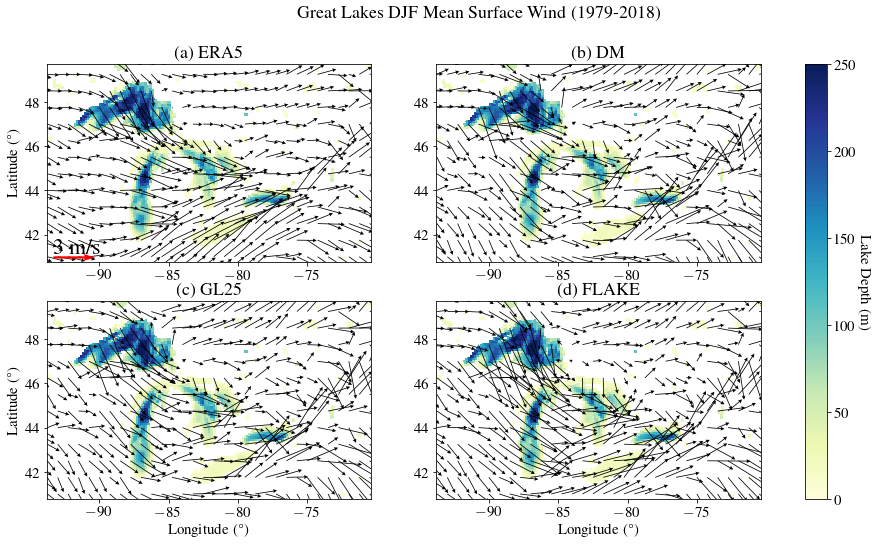

In [73]:
dd=3
lon1=np.min(wrf_lon)+3;lon2=np.max(wrf_lon)-3;lat1=np.min(wrf_lat)+1;lat2=np.max(wrf_lat)-1
v2=250
X, Y = np.mgrid[lon1+.5:lon1+1:0.5, lat1+.2:lat1+.7:0.5]
u = np.ones_like(X)*3;v = np.zeros_like(Y)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8)) #20,8 for GL and GSBLA
ax1= axes.flat[0];
ax1.title.set_text('(a) ERA5')
im=ax1.pcolor(wrf_lon,wrf_lat,D, cmap='YlGnBu',vmin=0, vmax=v2)
ax1.quiver(era_lon[0::dd], era_lat[0::dd], u_e[0::dd,0::dd], v_e[0::dd,0::dd], angles='xy', scale_units='xy', scale=1,headwidth=5)
ax1.quiver(X,Y, u, v, units='xy', angles='xy', scale_units='xy', scale=1,width=0.15,color='r')
ax1.text(X, Y+.2, str(int(u[0,0]))+' m/s', fontsize = 22)
ax1.set_xlim([lon1, lon2]);ax1.set_ylim([lat1, lat2])
ax1.set_ylabel('Latitude (\N{DEGREE SIGN})')
ax1= axes.flat[1]
ax1.title.set_text('(b) DM')
ax1.pcolor(wrf_lon,wrf_lat,D, cmap='YlGnBu',vmin=0, vmax=v2)
ax1.quiver(era_lon[0::dd], era_lat[0::dd], u_d_z[0::dd,0::dd], v_d_z[0::dd,0::dd], angles='xy', scale_units='xy', scale=1,headwidth=5)
ax1.set_xlim([lon1, lon2]);ax1.set_ylim([lat1, lat2])
ax1= axes.flat[2]
ax1.title.set_text('(c) GL25')
ax1.pcolor(wrf_lon,wrf_lat,D, cmap='YlGnBu',vmin=0, vmax=v2)
ax1.quiver(era_lon[0::dd], era_lat[0::dd], u_g_z[0::dd,0::dd], v_g_z[0::dd,0::dd], angles='xy', scale_units='xy', scale=1,headwidth=5)
ax1.set_xlim([lon1, lon2]);ax1.set_ylim([lat1, lat2])
ax1.set_ylabel('Latitude (\N{DEGREE SIGN})')
ax1.set_xlabel('Longitude (\N{DEGREE SIGN})')
ax1= axes.flat[3]
ax1.title.set_text('(d) FLAKE')
ax1.pcolor(wrf_lon,wrf_lat,D, cmap='YlGnBu',vmin=0, vmax=v2)
ax1.quiver(era_lon[0::dd], era_lat[0::dd], u_f_z[0::dd,0::dd], v_f_z[0::dd,0::dd], angles='xy', scale_units='xy', scale=1,headwidth=5)
ax1.set_xlim([lon1, lon2]);ax1.set_ylim([lat1, lat2])
ax1.set_xlabel('Longitude (\N{DEGREE SIGN})')
plt.suptitle('Great Lakes DJF Mean Surface Wind (1979-2018)')
cbar = fig.colorbar(im, ax=axes.ravel().tolist())#, orientation = 'horizontal'
cbar.set_label('Lake Depth (m)', rotation=-90, labelpad=15)
fig.patch.set_facecolor('xkcd:white')
plt.show()


In [4]:
year1=1979;ntim=(2019-year1)*12
os.chdir("/scratch/p/peltier/huoyilin/CanadaLakeData/NOAAGLERL")
# Read header
hdr = [gl('g'+str(year1)+'0101.ct', i) for i in range(1,7)]
values = [float(h.split(" ")[-1].strip()) for h in hdr]
ncols, nrows, xllcorner, yllcorner, cellsize, NODATA_value = values
ncols=int(ncols);nrows=int(nrows)
del hdr, values
# Read latitude/longitude data
lat_gl = np.loadtxt("1024_latgrid.txt")
lon_gl = np.loadtxt("1024_longrid.txt")
monthindex=np.zeros((ntim))
Ice_gl=np.zeros((ntim,ncols,nrows))
for iyear in range (0,2019-year1):
    for file in sorted(glob.glob('g'+str(iyear+1979)+'*.ct')):
        imonth=int(file[5:7])+12*iyear-1
        data = np.loadtxt(file, skiprows=7)
        data[data<0]=np.nan
        Ice_gl[imonth]+=data
        monthindex[imonth]+=1
monthindex*=100 ##to 0-1
for itim in range(0,ntim):
    if monthindex[itim]>0:
        Ice_gl[itim]/=monthindex[itim]
    else:
        Ice_gl[itim]=np.nan

In [5]:
q=nc.Dataset('/scratch/p/peltier/huoyilin/CanadaLakeData/ERA5_monthly_1979-2018.nc','r',format='NETCDF4');
u_temp = q.variables['u10'][:];v_temp = q.variables['v10'][:]
wind_temp=np.sqrt(np.square(u_temp)+np.square(v_temp))
era_lat=q.variables['latitude'][:];era_lon = q.variables['longitude'][:]
xv, yv = np.meshgrid(era_lon, era_lat)
ntim=len(u_temp)
wind_e=np.zeros((ntim,ncols, nrows))
for itim in range(0,ntim):
    wind_e[itim]= griddata((xv.flatten(),yv.flatten()), wind_temp[itim].flatten(), (lon_gl, lat_gl))
for imonth in range(0,12):
    windmonthly=np.nanmean(wind_e[imonth::12],axis=0)
    wind_e[imonth::12]-=windmonthly
# Ice_tmp=Ice_gl
# for imonth in range(0,12):
#     Icemonthly=np.nanmean(Ice_tmp[imonth::12],axis=0)
#     Ice_tmp[imonth::12]-=Icemonthly
corr=np.zeros((ncols, nrows))
for i in range(0,ncols):
    for j in range(0,nrows):
        corr[i,j]=np.ma.corrcoef(np.ma.masked_invalid(wind_e[:,i,j]), np.ma.masked_invalid(Ice_tmp[:,i,j]))[0,1]

<ipython-input-5-c7d43d886983>:11: RuntimeWarning: Mean of empty slice
  windmonthly=np.nanmean(wind_e[imonth::12],axis=0)


In [6]:
lake_list=['Superior','Huron','Michigan','Ontario', 'Erie']#,'GreatBear','GreatSlave','Athabasca','Winnipegosis', 'Winnipeg']
lakenum=len(lake_list)
freq='monthly'
model='78g'
q=nc.Dataset('/scratch/p/peltier/huoyilin/mahdinia/wrfconst_d01_RC'+model+'_LAKEMASK_LAKE_DEPTH.nc','r',format='NETCDF4')
wrf_land=q.variables['LAKEMASK'][0]
D= q.variables['LAKE_DEPTH'][0]
wrf_lat=q.variables['XLAT'][0]
wrf_lon=q.variables['XLONG'][0]
nlat=len(wrf_lat);nlon=len(wrf_lat[0])
wrf_land[wrf_land==0]=np.nan
q=nc.Dataset('/scratch/p/peltier/mahdinia/ERAI_AND_ERA5_RUN_CASES/WRFTools_RC'+model+'/wrfavg_SMALL/wrfsrfc_d01_'+freq+'.nc','r',format='NETCDF4')
LakeIce=q.variables['IceFrac_H0.001']
ntim=len(LakeIce)
Ice_tmp=np.zeros((ntim,ncols, nrows))
for itim in range(0,ntim):
    Ice_tmp[itim]= griddata((wrf_lon.flatten(),wrf_lat.flatten()), LakeIce[itim].flatten(), (lon_gl, lat_gl))-Ice_gl[itim]
for imonth in range(0,12):
    Icemonthly=np.nanmean(Ice_tmp[imonth::12],axis=0)
    Ice_tmp[imonth::12]-=Icemonthly
#Ice_f=Ice_tmp
wrf_lake_z=np.zeros((lakenum,ncols,nrows))
for lakeid in range(0,lakenum):
    q=nc.Dataset('/project/p/peltier/huoyilin/wmo_basins_shp/'+lake_list[lakeid]+'_mask.nc','r',format='NETCDF4')
    wrf_lake=q.variables['mask_array'][:].astype(np.float)
    wrf_lake[wrf_lake<=0]=np.nan
    wrf_lake_z[lakeid]= griddata((wrf_lon.flatten(),wrf_lat.flatten()), wrf_lake.flatten(), (lon_gl, lat_gl))
corr_f=np.zeros((ntim,lakenum))
for itim in range(0,ntim):
    for lakeid in range(0,lakenum):
        indx=Ice_tmp[itim]*0*wrf_lake_z[lakeid]
        corr_f[itim,lakeid]=np.ma.corrcoef(np.ma.masked_invalid((wind_e[itim]+indx).flatten()), np.ma.masked_invalid(Ice_tmp[itim].flatten()))[0,1]    
##for DM
model='14'
q=nc.Dataset('/scratch/p/peltier/mahdinia/ERAI_AND_ERA5_RUN_CASES/WRFTools_RC'+model+'/wrfavg_SMALL/wrflsm_d01_'+freq+'.nc','r',format='NETCDF4')
LakeIce= q.variables['IceFrac_A60']#for DM
ntim=len(LakeIce)
Ice_tmp=np.zeros((ntim,ncols, nrows))
for itim in range(0,ntim):
    Ice_tmp[itim]= griddata((wrf_lon.flatten(),wrf_lat.flatten()), LakeIce[itim].flatten(), (lon_gl, lat_gl))-Ice_gl[itim]
for imonth in range(0,12):
    Icemonthly=np.nanmean(Ice_tmp[imonth::12],axis=0)
    Ice_tmp[imonth::12]-=Icemonthly
#Ice_d=Ice_tmp
corr_d=np.zeros((ntim,lakenum))
for itim in range(0,ntim):
    for lakeid in range(0,lakenum):
        indx=Ice_tmp[itim]*0*wrf_lake_z[lakeid]
        corr_d[itim,lakeid]=np.ma.corrcoef(np.ma.masked_invalid((wind_e[itim]+indx).flatten()), np.ma.masked_invalid(Ice_tmp[itim].flatten()))[0,1]    
##for GL25
model='13'
q=nc.Dataset('/scratch/p/peltier/mahdinia/ERAI_AND_ERA5_RUN_CASES/WRFTools_RC'+model+'/wrfavg_SMALL/wrflsm_d01_'+freq+'.nc','r',format='NETCDF4')
LAKE_ICEFRAC3D = q.variables['LAKE_ICEFRAC3D']
LakeIce=LAKE_ICEFRAC3D[:,0,:,:] #top layer ice
LakeIce[LakeIce < 0] = 0
Ice_tmp=np.zeros((ntim,ncols, nrows))
for itim in range(0,ntim):
    Ice_tmp[itim]= griddata((wrf_lon.flatten(),wrf_lat.flatten()), LakeIce[itim].flatten(), (lon_gl, lat_gl))-Ice_gl[itim]
for imonth in range(0,12):
    Icemonthly=np.nanmean(Ice_tmp[imonth::12],axis=0)
    Ice_tmp[imonth::12]-=Icemonthly
#Ice_g=Ice_tmp
corr_g=np.zeros((ntim,lakenum))
for itim in range(0,ntim):
    for lakeid in range(0,lakenum):
        indx=Ice_tmp[itim]*0*wrf_lake_z[lakeid]
        corr_g[itim,lakeid]=np.ma.corrcoef(np.ma.masked_invalid((wind_e[itim]+indx).flatten()), np.ma.masked_invalid(Ice_tmp[itim].flatten()))[0,1]    

Ice_tmp=Ice_gl
for imonth in range(0,12):
    Icemonthly=np.nanmean(Ice_tmp[imonth::12],axis=0)
    Ice_tmp[imonth::12]-=Icemonthly
#Ice_g=Ice_tmp
corr=np.zeros((ntim,lakenum))
for itim in range(0,ntim):
    for lakeid in range(0,lakenum):
        indx=Ice_tmp[itim]*0*wrf_lake_z[lakeid]
        corr[itim,lakeid]=np.ma.corrcoef(np.ma.masked_invalid((wind_e[itim]+indx).flatten()), np.ma.masked_invalid(Ice_tmp[itim].flatten()))[0,1]    

<ipython-input-6-acae78bdc755>:18: RuntimeWarning: Mean of empty slice
  Icemonthly=np.nanmean(Ice_tmp[imonth::12],axis=0)
<ipython-input-6-acae78bdc755>:31: UserWarning: Warning: converting a masked element to nan.
  corr_f[itim,lakeid]=np.ma.corrcoef(np.ma.masked_invalid((wind_e[itim]+indx).flatten()), np.ma.masked_invalid(Ice_tmp[itim].flatten()))[0,1]
<ipython-input-6-acae78bdc755>:41: RuntimeWarning: Mean of empty slice
  Icemonthly=np.nanmean(Ice_tmp[imonth::12],axis=0)
<ipython-input-6-acae78bdc755>:48: UserWarning: Warning: converting a masked element to nan.
  corr_d[itim,lakeid]=np.ma.corrcoef(np.ma.masked_invalid((wind_e[itim]+indx).flatten()), np.ma.masked_invalid(Ice_tmp[itim].flatten()))[0,1]
<ipython-input-6-acae78bdc755>:59: RuntimeWarning: Mean of empty slice
  Icemonthly=np.nanmean(Ice_tmp[imonth::12],axis=0)
<ipython-input-6-acae78bdc755>:66: UserWarning: Warning: converting a masked element to nan.
  corr_g[itim,lakeid]=np.ma.corrcoef(np.ma.masked_invalid((wind_e[it

NameError: name 'corr' is not defined

In [ ]:
q=nc.Dataset('/scratch/p/peltier/huoyilin/CanadaLakeData/ERA5_monthly_1979-2018.nc','r',format='NETCDF4');
u_temp = q.variables['u10'][:];v_temp = q.variables['v10'][:]
wind_temp=np.sqrt(np.square(u_temp)+np.square(v_temp))
era_lat=q.variables['latitude'][:];era_lon = q.variables['longitude'][:]
xv, yv = np.meshgrid(era_lon, era_lat)
ntim=len(u_temp)
wind_e=np.zeros((ntim,ncols, nrows))
for itim in range(0,ntim):
    wind_e[itim]= griddata((xv.flatten(),yv.flatten()), wind_temp[itim].flatten(), (lon_gl, lat_gl))
for imonth in range(0,12):
    windmonthly=np.nanmean(wind_e[imonth::12],axis=0)
    wind_e[imonth::12]-=windmonthly
model='14'
q=nc.Dataset('/scratch/p/peltier/mahdinia/ERAI_AND_ERA5_RUN_CASES/WRFTools_RC'+model+'/wrfavg_SMALL/wrfsrfc_d01_'+freq+'.nc','r',format='NETCDF4')
#u_temp = q.variables['U10'][:];v_temp = q.variables['V10'][:]
wind_temp=q.variables['WindSpeed'][:]
ntim=len(u_temp)
wind_z=np.zeros((ntim,ncols, nrows))
corr_d=np.zeros((ncols, nrows))
for itim in range(0,ntim):
    wind_z[itim]= griddata((wrf_lon.flatten(),wrf_lat.flatten()), wind_temp[itim].flatten(), (lon_gl, lat_gl))-wind_e[itim]
for i in range(0,ncols):
    for j in range(0,nrows):
        corr_d[i,j]=np.ma.corrcoef(np.ma.masked_invalid(wind_z[:,i,j]), np.ma.masked_invalid(Ice_d[:,i,j]))[0,1]
model='13'
q=nc.Dataset('/scratch/p/peltier/mahdinia/ERAI_AND_ERA5_RUN_CASES/WRFTools_RC'+model+'/wrfavg_SMALL/wrfsrfc_d01_'+freq+'.nc','r',format='NETCDF4')
#u_temp = q.variables['U10'][:];v_temp = q.variables['V10'][:]
wind_temp=q.variables['WindSpeed'][:]
wind_z=np.zeros((ntim,ncols, nrows))
corr_g=np.zeros((ncols, nrows))
for itim in range(0,ntim):
    wind_z[itim]= griddata((wrf_lon.flatten(),wrf_lat.flatten()), wind_temp[itim].flatten(), (lon_gl, lat_gl))-wind_e[itim]
for i in range(0,ncols):
    for j in range(0,nrows):
        corr_g[i,j]=np.ma.corrcoef(np.ma.masked_invalid(wind_z[:,i,j]), np.ma.masked_invalid(Ice_g[:,i,j]))[0,1]
model='78g'
q=nc.Dataset('/scratch/p/peltier/mahdinia/ERAI_AND_ERA5_RUN_CASES/WRFTools_RC'+model+'/wrfavg_SMALL/wrfsrfc_d01_'+freq+'.nc','r',format='NETCDF4')
#u_temp = q.variables['U10'][:];v_temp = q.variables['V10'][:]
wind_temp=q.variables['WindSpeed'][:]
wind_z=np.zeros((ntim,ncols, nrows))
corr_f=np.zeros((ncols, nrows))
for itim in range(0,ntim):
    wind_z[itim]= griddata((wrf_lon.flatten(),wrf_lat.flatten()), wind_temp[itim].flatten(), (lon_gl, lat_gl))-wind_e[itim]
for i in range(0,ncols):
    for j in range(0,nrows):
        corr_f[i,j]=np.ma.corrcoef(np.ma.masked_invalid(wind_z[:,i,j]), np.ma.masked_invalid(Ice_f[:,i,j]))[0,1]

<ipython-input-48-f8ef531f919e>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im=ax1.pcolor(lon_gl, lat_gl, corr_d, cmap='seismic',vmin=v1, vmax=v2)
<ipython-input-48-f8ef531f919e>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax1.pcolor(lon_gl, lat_gl, corr_g, cmap='seismic',vmin=v1, vmax=v2)
<ipython-input-48-f8ef531f919e>:31: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either sp

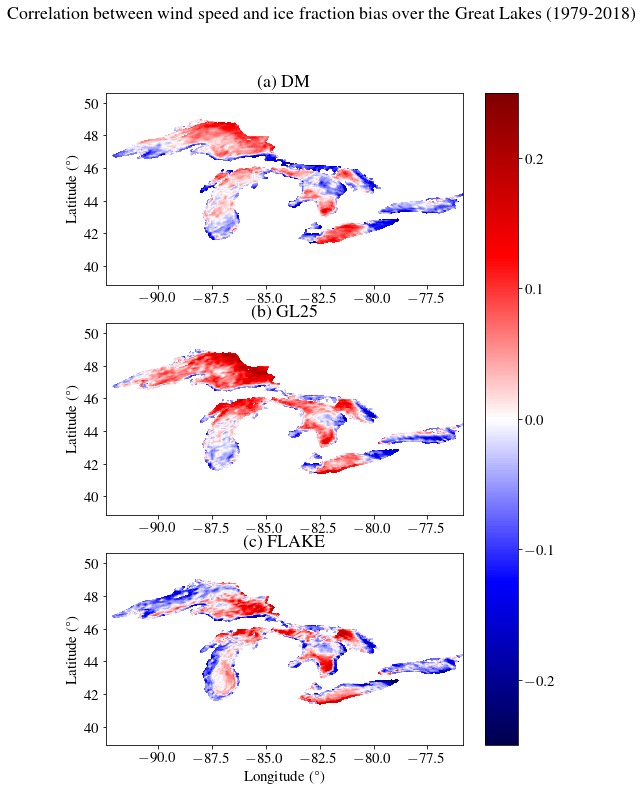

In [48]:
os.chdir("/scratch/p/peltier/huoyilin/CanadaLakeData/NOAAGLERL")
# Read header
hdr = [gl('g19790101.ct', i) for i in range(1,7)]
values = [float(h.split(" ")[-1].strip()) for h in hdr]
ncols, nrows, xllcorner, yllcorner, cellsize, NODATA_value = values
ncols=int(ncols);nrows=int(nrows)
del hdr, values
# Read latitude/longitude data
lat_gl = np.loadtxt("1024_latgrid.txt")
lon_gl = np.loadtxt("1024_longrid.txt")
year1=1979
corr_d=np.loadtxt('/scratch/p/peltier/huoyilin/CanadaLakeData/NOAAGLERL/WindIceCorr_d.dat') 
corr_g=np.loadtxt('/scratch/p/peltier/huoyilin/CanadaLakeData/NOAAGLERL/WindIceCorr_g.dat') 
corr_f=np.loadtxt('/scratch/p/peltier/huoyilin/CanadaLakeData/NOAAGLERL/WindIceCorr_f.dat') 
v1=-.25;v2=-v1
lon1=np.min(lon_gl);lon2=np.max(lon_gl);lat1=np.min(lat_gl);lat2=np.max(lat_gl)
#lon1=-126;lon2=-107;lat1=58;lat2=68
#lon1=-102;lon2=-96;lat1=50;lat2=55
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))
ax1= axes.flat[0];
ax1.title.set_text('(a) DM') 
im=ax1.pcolor(lon_gl, lat_gl, corr_d, cmap='seismic',vmin=v1, vmax=v2)
ax1.set_ylim([lat1,lat2]);ax1.set_xlim([lon1,lon2])
ax1.set_ylabel('Latitude (\N{DEGREE SIGN})')
ax1= axes.flat[1];
ax1.title.set_text('(b) GL25') 
ax1.pcolor(lon_gl, lat_gl, corr_g, cmap='seismic',vmin=v1, vmax=v2)
ax1.set_ylim([lat1,lat2]);ax1.set_xlim([lon1,lon2])
ax1.set_ylabel('Latitude (\N{DEGREE SIGN})')
ax1= axes.flat[2];
ax1.title.set_text('(c) FLAKE')
ax1.pcolor(lon_gl, lat_gl, corr_f, cmap='seismic',vmin=v1, vmax=v2)
ax1.set_ylim([lat1,lat2]);ax1.set_xlim([lon1,lon2])
ax1.set_ylabel('Latitude (\N{DEGREE SIGN})')
ax1.set_xlabel('Longitude (\N{DEGREE SIGN})')
cbar = fig.colorbar(im, ax=axes.ravel().tolist())#, orientation = 'horizontal'
#cbar.set_label('Percentage', rotation=-90, labelpad=15)
plt.suptitle('Correlation between wind speed and ice fraction bias over the Great Lakes ('+str(year1)+'-2018)') 
fig.patch.set_facecolor('xkcd:white')
plt.show() 

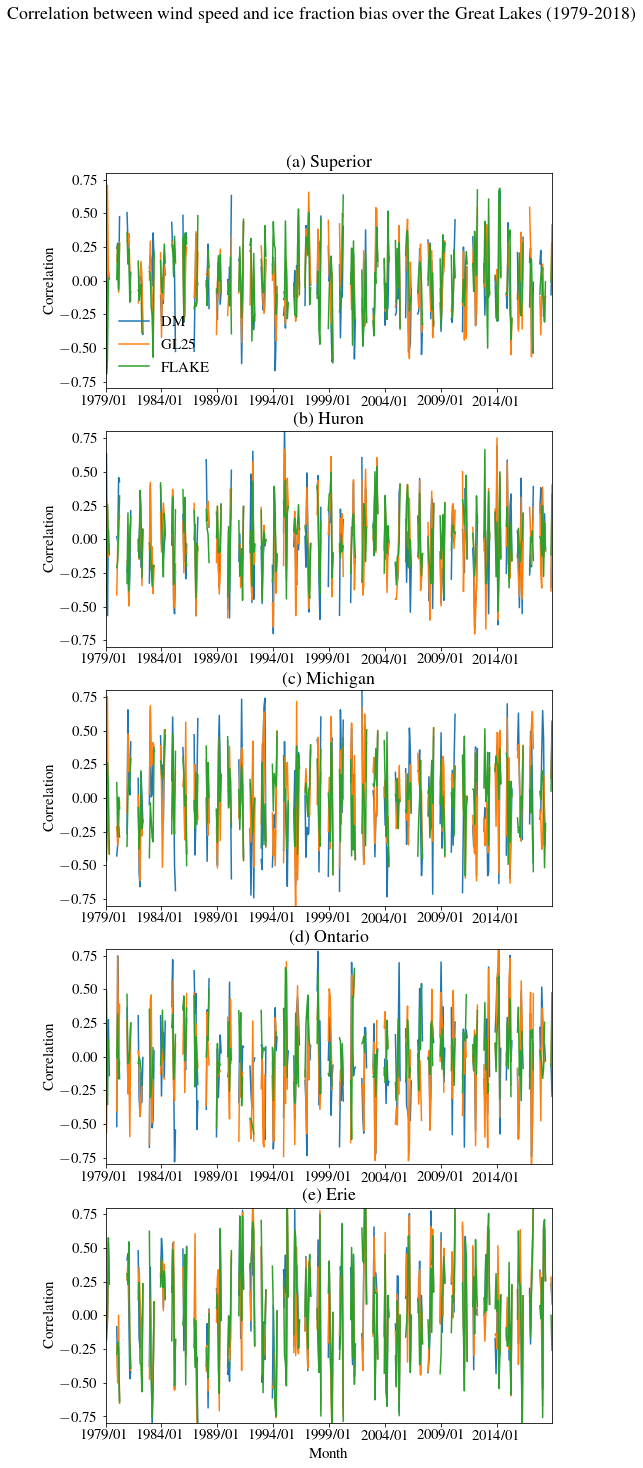

In [14]:
# corr_d=np.loadtxt('/scratch/p/peltier/huoyilin/CanadaLakeData/NOAAGLERL/WindIceSpatialCorr_d.dat') 
# corr_g=np.loadtxt('/scratch/p/peltier/huoyilin/CanadaLakeData/NOAAGLERL/WindIceSpatialCorr_g.dat') 
# corr_f=np.loadtxt('/scratch/p/peltier/huoyilin/CanadaLakeData/NOAAGLERL/WindIceSpatialCorr_f.dat') 
# lake_list=['Superior','Huron','Michigan','Ontario', 'Erie']#,'GreatBear','GreatSlave','Athabasca','Winnipegosis', 'Winnipeg']
# lakenum=len(lake_list)
letters=['a','b','c','d','e','f','g']
fig = plt.figure()
fig.set_size_inches(8, 23)
for lakeid in range(0, lakenum):
    ax1 = fig.add_subplot(lakenum,1,lakeid+1)
    ax1.title.set_text('('+letters[lakeid]+') '+lake_list[lakeid])
    plt.plot(range(1,ntim+1),corr_d[:,lakeid], label = 'DM') 
    plt.plot(range(1,ntim+1),corr_g[:,lakeid], label = 'GL25') 
    plt.plot(range(1,ntim+1),corr_f[:,lakeid], label = 'FLAKE') 
    plt.ylabel('Correlation')
    plt.setp(ax1, xticks=range(1,ntim+1,60), xticklabels=['1979/01', '1984/01', '1989/01','1994/01','1999/01', '2004/01','2009/01', '2014/01'])
    plt.axis([1, 480,-.8 ,.8])
    if lakeid==0:
        plt.legend(frameon=False)
    if lakeid==lakenum-1:
        plt.xlabel('Month')
plt.suptitle('Correlation between wind speed and ice fraction bias over the Great Lakes ('+str(year1)+'-2018)') 
fig.patch.set_facecolor('xkcd:white')
plt.show()

In [95]:
model='78g'
q=nc.Dataset('/scratch/p/peltier/mahdinia/ERAI_AND_ERA5_RUN_CASES/WRFTools_RC'+model+'/wrfavg_SMALL/wrfsrfc_d01_'+freq+'.nc','r',format='NETCDF4')
#u_temp = q.variables['U10'][:];v_temp = q.variables['V10'][:]
wind_temp=q.variables['WindSpeed'][:]
wind_z=np.zeros((ntim,ncols, nrows))
corr_f=np.zeros((ncols, nrows))
for itim in range(0,ntim):
    wind_z[itim]= griddata((wrf_lon.flatten(),wrf_lat.flatten()), wind_temp[itim].flatten(), (lon_gl, lat_gl))-wind_e[itim]
for i in range(0,ncols):
    for j in range(0,nrows):
        corr_f[i,j]=np.ma.corrcoef(np.ma.masked_invalid(wind_z[:,i,j]), np.ma.masked_invalid(Ice_f[:,i,j]))[0,1]

<ipython-input-95-43d12a6244e0>:11: UserWarning: Warning: converting a masked element to nan.
  corr_f[i,j]=np.ma.corrcoef(np.ma.masked_invalid(wind_z[:,i,j]), np.ma.masked_invalid(Ice_f[:,i,j]))[0,1]


In [57]:
# model='78g'
# q=nc.Dataset('/scratch/p/peltier/huoyilin/mahdinia/wrfconst_d01_RC'+model+'_LAKEMASK_LAKE_DEPTH.nc','r',format='NETCDF4')
# wrf_land=q.variables['LAKEMASK'][0]
# D= q.variables['LAKE_DEPTH'][0]
# D_tmp= griddata((wrf_lon.flatten(),wrf_lat.flatten()), D.flatten(), (lon_gl, lat_gl))
# Ice_tmp=Ice_gl
# for imonth in range(0,12):
#     Icemonthly=np.nanmean(Ice_tmp[imonth::12],axis=0)
#     Ice_tmp[imonth::12]-=Icemonthly
corr=np.zeros((ntim,lakenum))
for itim in range(0,ntim):
    for lakeid in range(0,lakenum):
        indx=Ice_tmp[itim]*0*wrf_lake_z[lakeid]
        corr[itim,lakeid]=np.ma.corrcoef(np.ma.masked_invalid((wind_e[itim]+indx).flatten()), np.ma.masked_invalid(Ice_tmp[itim].flatten()))[0,1]    

<ipython-input-57-9b2945cbba1e>:14: UserWarning: Warning: converting a masked element to nan.
  corr[itim,lakeid]=np.ma.corrcoef(np.ma.masked_invalid((wind_e[itim]+indx).flatten()), np.ma.masked_invalid(Ice_tmp[itim].flatten()))[0,1]


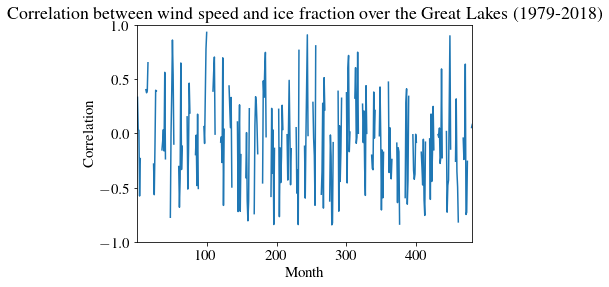

In [58]:
fig = plt.figure()
plt.plot(range(1,ntim+1),corr[:,lakeid]) 
plt.ylabel('Correlation')
plt.axis([1, 480,-1 ,1])
plt.xlabel('Month')
plt.title('Correlation between wind speed and ice fraction over the Great Lakes ('+str(year1)+'-2018)') 
fig.patch.set_facecolor('xkcd:white')
plt.show()


<ipython-input-61-0e13e3c4022a>:5: UserWarning: Warning: converting a masked element to nan.
  corr[i,j]=np.ma.corrcoef(np.ma.masked_invalid(wind_e[:,i,j]), np.ma.masked_invalid(Ice_tmp[:,i,j]))[0,1]
<ipython-input-61-0e13e3c4022a>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im=plt.pcolor(lon_gl, lat_gl, corr, cmap='seismic',vmin=v1, vmax=v2)


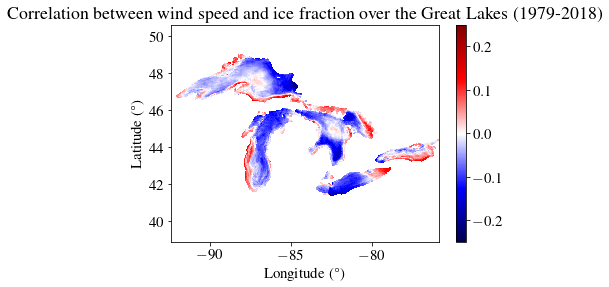

In [61]:
ncols=int(ncols);nrows=int(nrows)
corr=np.zeros((ncols, nrows))
for i in range(0,ncols):
    for j in range(0,nrows):
        corr[i,j]=np.ma.corrcoef(np.ma.masked_invalid(wind_e[:,i,j]), np.ma.masked_invalid(Ice_tmp[:,i,j]))[0,1]
lon1=np.min(lon_gl);lon2=np.max(lon_gl);lat1=np.min(lat_gl);lat2=np.max(lat_gl)
fig = plt.figure()
plt.title('Correlation between wind speed and ice fraction over the Great Lakes ('+str(year1)+'-2018)') 
im=plt.pcolor(lon_gl, lat_gl, corr, cmap='seismic',vmin=v1, vmax=v2)
plt.ylim([lat1,lat2]);plt.xlim([lon1,lon2])
plt.ylabel('Latitude (\N{DEGREE SIGN})')
plt.xlabel('Longitude (\N{DEGREE SIGN})') 
cbar = plt.colorbar(im)#, orientation = 'horizontal'
#cbar.set_label('Percentage', rotation=-90, labelpad=15)
fig.patch.set_facecolor('xkcd:white')
plt.show() 

In [47]:
np.nanmax(abs(corr_d))


0.2606721883428337